In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
data  = pd.read_csv('diamonds.csv')
data

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,...,8.66,M,STK,unknown,None,unknown,unknown,unknown,unknown,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,...,5.71,TK,XTK,unknown,None,Green,unknown,None,Fancy Light,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,...,10.20,TN,M,unknown,None,unknown,unknown,unknown,unknown,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,...,3.47,XTN,VTK,unknown,Faint,Red,unknown,unknown,Fancy,1350000


#**Dataset preprocessing and transformation**

In the above the data we can see that the most of the column  have unknown value so by counting the each unknown value and if in a particular column having unknown value is more than 70% so we can drop the particular column

In [116]:
data['fancy_color_intensity'].value_counts()




unknown          210541
Fancy              3447
Fancy Intense      1943
Fancy Light        1288
Fancy Deep          777
Fancy Vivid         714
Light               318
Faint               238
Fancy Dark          238
Very Light          199
Name: fancy_color_intensity, dtype: int64

In [117]:
data['fancy_color_overtone'].value_counts()


unknown      217665
None           1650
Brownish        123
Yellowish        78
Orangey          54
Pinkish          51
Greenish         47
Purplish         34
Grayish           1
Name: fancy_color_overtone, dtype: int64

In [118]:
data['fancy_color_secondary_color'].value_counts()


unknown    218641
Brown         306
Yellow        239
Orange        155
Pink          126
Green         105
Purple         81
Gray           36
Blue           11
Violet          2
Red             1
Name: fancy_color_secondary_color, dtype: int64

In [119]:
data['fancy_color_dominant_color'].value_counts()


unknown      210539
Yellow         6487
Pink           1369
Brown           531
Green           302
Orange          271
Purple           76
Gray             66
Blue             38
Chameleon        12
Black             6
Red               4
Other             2
Name: fancy_color_dominant_color, dtype: int64

In [120]:
data['fluor_intensity'].value_counts()


None           143491
Faint           38302
Medium          20705
Strong          13243
Very Slight      2729
Very Strong      1093
unknown           128
Slight             12
Name: fluor_intensity, dtype: int64

In [121]:
data['fluor_color'].value_counts()


unknown    203977
Blue        15219
Yellow        400
Green          55
White          42
Orange         10
Name: fluor_color, dtype: int64

In [122]:
data['eye_clean'].value_counts()


unknown       156916
Yes            61931
Borderline       515
E1               300
No                41
Name: eye_clean, dtype: int64

In [123]:
data['cut_quality'].value_counts()


Excellent    124861
unknown       60607
Very Good     34201
Good             28
Fair              5
Ideal             1
Name: cut_quality, dtype: int64

In [124]:
data['color'].value_counts()

E          33103
F          31566
D          30873
G          29184
H          26073
I          22364
J          16898
K          11750
unknown     9162
L           5683
M           3047
Name: color, dtype: int64

In [125]:
data['culet_condition'].value_counts()

unknown    204384
Pointed     15293
Chipped        18
Abraded         8
Name: culet_condition, dtype: int64

In [126]:
data['culet_size'].value_counts()

N          131899
unknown     85740
VS           1345
S             476
M             163
L              58
SL             14
EL              4
VL              4
Name: culet_size, dtype: int64

using value_counts() function we count the unknown values for each column and we found that most of the column having more than 90% value is unknown so we can drop these column

In [127]:
data  = data.drop(['fancy_color_intensity','fancy_color_overtone','fancy_color_secondary_color','fancy_color_dominant_color','fluor_color','eye_clean','culet_condition','girdle_min','girdle_max','fluor_intensity','Unnamed: 0'],axis = 1)
data

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,culet_size,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,N,62.7,59.0,2.85,2.87,1.79,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,N,61.9,59.0,2.84,2.89,1.78,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.0,59.0,2.86,2.88,1.78,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,N,64.9,58.5,2.79,2.83,1.82,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,N,61.3,58.0,14.06,14.18,8.66,1210692
219699,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,64.8,65.0,11.55,8.81,5.71,1292500
219700,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,N,60.2,59.0,17.06,17.10,10.20,1315496
219701,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,N,70.8,72.0,5.22,4.90,3.47,1350000


since we drop all the column those having unknown values more than 90% but there are the columns having unknown values in the column is less than 90% so we have replace that unknown values by mode of that particular column

In [128]:
data['color'].mode()


0    E
Name: color, dtype: object

In [129]:
data['color'].replace('unknown','E',inplace = True)
data

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,culet_size,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,N,62.7,59.0,2.85,2.87,1.79,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,N,61.9,59.0,2.84,2.89,1.78,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.0,59.0,2.86,2.88,1.78,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,N,64.9,58.5,2.79,2.83,1.82,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,N,61.3,58.0,14.06,14.18,8.66,1210692
219699,Radiant,E,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,64.8,65.0,11.55,8.81,5.71,1292500
219700,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,N,60.2,59.0,17.06,17.10,10.20,1315496
219701,Princess,E,SI2,0.90,unknown,GIA,Good,Good,N,70.8,72.0,5.22,4.90,3.47,1350000


In [130]:
data['cut_quality'].mode()

0    Excellent
Name: cut_quality, dtype: object

In [131]:
data['cut_quality'].replace('unknown','Excellent',inplace = True)
data

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,culet_size,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,N,62.7,59.0,2.85,2.87,1.79,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,N,61.9,59.0,2.84,2.89,1.78,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.0,59.0,2.86,2.88,1.78,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,N,64.9,58.5,2.79,2.83,1.82,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,N,61.3,58.0,14.06,14.18,8.66,1210692
219699,Radiant,E,VS2,5.17,Excellent,GIA,Very Good,Very Good,unknown,64.8,65.0,11.55,8.81,5.71,1292500
219700,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,N,60.2,59.0,17.06,17.10,10.20,1315496
219701,Princess,E,SI2,0.90,Excellent,GIA,Good,Good,N,70.8,72.0,5.22,4.90,3.47,1350000


In [132]:
data['culet_size'].mode()

0    N
Name: culet_size, dtype: object

In [133]:
data['culet_size'].replace('unknown','N',inplace = True)
data

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,culet_size,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,N,62.7,59.0,2.85,2.87,1.79,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,N,61.9,59.0,2.84,2.89,1.78,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,N,61.1,59.0,2.88,2.90,1.77,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,N,62.0,59.0,2.86,2.88,1.78,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,N,64.9,58.5,2.79,2.83,1.82,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,N,61.3,58.0,14.06,14.18,8.66,1210692
219699,Radiant,E,VS2,5.17,Excellent,GIA,Very Good,Very Good,N,64.8,65.0,11.55,8.81,5.71,1292500
219700,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,N,60.2,59.0,17.06,17.10,10.20,1315496
219701,Princess,E,SI2,0.90,Excellent,GIA,Good,Good,N,70.8,72.0,5.22,4.90,3.47,1350000


In [134]:
data['clarity'].value_counts()

SI1     38627
VS2     38173
VS1     36956
SI2     31105
VVS2    28985
VVS1    27877
IF       9974
I1       6961
I2        944
I3         91
SI3        10
Name: clarity, dtype: int64

In [135]:
data

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,culet_size,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,N,62.7,59.0,2.85,2.87,1.79,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,N,61.9,59.0,2.84,2.89,1.78,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,N,61.1,59.0,2.88,2.90,1.77,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,N,62.0,59.0,2.86,2.88,1.78,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,N,64.9,58.5,2.79,2.83,1.82,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,N,61.3,58.0,14.06,14.18,8.66,1210692
219699,Radiant,E,VS2,5.17,Excellent,GIA,Very Good,Very Good,N,64.8,65.0,11.55,8.81,5.71,1292500
219700,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,N,60.2,59.0,17.06,17.10,10.20,1315496
219701,Princess,E,SI2,0.90,Excellent,GIA,Good,Good,N,70.8,72.0,5.22,4.90,3.47,1350000


In [136]:
X1 = data.iloc[:,:3]
X2  =data.iloc[:,4:]
X = pd.concat([X1, X2], axis=1)
Y = data.iloc[:,3]

In [137]:
X

,cut,color,clarity,cut_quality,lab,symmetry,polish,culet_size,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
0,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,N,62.7,59.0,2.85,2.87,1.79,200
1,Round,E,VVS2,Very Good,IGI,Very Good,Very Good,N,61.9,59.0,2.84,2.89,1.78,200
2,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,N,61.1,59.0,2.88,2.90,1.77,200
3,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,N,62.0,59.0,2.86,2.88,1.78,200
4,Round,E,VVS2,Very Good,IGI,Very Good,Excellent,N,64.9,58.5,2.79,2.83,1.82,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,Excellent,GIA,Excellent,Excellent,N,61.3,58.0,14.06,14.18,8.66,1210692
219699,Radiant,E,VS2,Excellent,GIA,Very Good,Very Good,N,64.8,65.0,11.55,8.81,5.71,1292500
219700,Round,E,VS1,Excellent,GIA,Excellent,Excellent,N,60.2,59.0,17.06,17.10,10.20,1315496
219701,Princess,E,SI2,Excellent,GIA,Good,Good,N,70.8,72.0,5.22,4.90,3.47,1350000


In [138]:
Y

0          0.09
1          0.09
2          0.09
3          0.09
4          0.09
          ...  
219698    10.65
219699     5.17
219700    18.07
219701     0.90
219702    10.03
Name: carat_weight, Length: 219703, dtype: float64

In [139]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
X['color'] =label_encoder.fit_transform(X['color'])
X

,cut,color,clarity,cut_quality,lab,symmetry,polish,culet_size,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
0,Round,1,VVS2,Excellent,IGI,Very Good,Very Good,N,62.7,59.0,2.85,2.87,1.79,200
1,Round,1,VVS2,Very Good,IGI,Very Good,Very Good,N,61.9,59.0,2.84,2.89,1.78,200
2,Round,1,VVS2,Excellent,IGI,Very Good,Very Good,N,61.1,59.0,2.88,2.90,1.77,200
3,Round,1,VVS2,Excellent,IGI,Very Good,Very Good,N,62.0,59.0,2.86,2.88,1.78,200
4,Round,1,VVS2,Very Good,IGI,Very Good,Excellent,N,64.9,58.5,2.79,2.83,1.82,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,Round,1,VS1,Excellent,GIA,Excellent,Excellent,N,61.3,58.0,14.06,14.18,8.66,1210692
219699,Radiant,1,VS2,Excellent,GIA,Very Good,Very Good,N,64.8,65.0,11.55,8.81,5.71,1292500
219700,Round,1,VS1,Excellent,GIA,Excellent,Excellent,N,60.2,59.0,17.06,17.10,10.20,1315496
219701,Princess,1,SI2,Excellent,GIA,Good,Good,N,70.8,72.0,5.22,4.90,3.47,1350000


In [140]:
label_encoder = LabelEncoder()
X['clarity'] =label_encoder.fit_transform(X['clarity'])
X

,cut,color,clarity,cut_quality,lab,symmetry,polish,culet_size,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
0,Round,1,10,Excellent,IGI,Very Good,Very Good,N,62.7,59.0,2.85,2.87,1.79,200
1,Round,1,10,Very Good,IGI,Very Good,Very Good,N,61.9,59.0,2.84,2.89,1.78,200
2,Round,1,10,Excellent,IGI,Very Good,Very Good,N,61.1,59.0,2.88,2.90,1.77,200
3,Round,1,10,Excellent,IGI,Very Good,Very Good,N,62.0,59.0,2.86,2.88,1.78,200
4,Round,1,10,Very Good,IGI,Very Good,Excellent,N,64.9,58.5,2.79,2.83,1.82,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,Round,1,7,Excellent,GIA,Excellent,Excellent,N,61.3,58.0,14.06,14.18,8.66,1210692
219699,Radiant,1,8,Excellent,GIA,Very Good,Very Good,N,64.8,65.0,11.55,8.81,5.71,1292500
219700,Round,1,7,Excellent,GIA,Excellent,Excellent,N,60.2,59.0,17.06,17.10,10.20,1315496
219701,Princess,1,5,Excellent,GIA,Good,Good,N,70.8,72.0,5.22,4.90,3.47,1350000


In [141]:
label_encoder = LabelEncoder()
X['cut'] =label_encoder.fit_transform(X['cut'])
X['cut_quality'] =label_encoder.fit_transform(X['cut_quality'])
X['lab'] =label_encoder.fit_transform(X['lab'])
X['symmetry'] =label_encoder.fit_transform(X['symmetry'])
X['polish'] =label_encoder.fit_transform(X['polish'])
X['culet_size'] =label_encoder.fit_transform(X['culet_size'])
X

,cut,color,clarity,cut_quality,lab,symmetry,polish,culet_size,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
0,10,1,10,0,2,4,4,3,62.7,59.0,2.85,2.87,1.79,200
1,10,1,10,4,2,4,4,3,61.9,59.0,2.84,2.89,1.78,200
2,10,1,10,0,2,4,4,3,61.1,59.0,2.88,2.90,1.77,200
3,10,1,10,0,2,4,4,3,62.0,59.0,2.86,2.88,1.78,200
4,10,1,10,4,2,4,0,3,64.9,58.5,2.79,2.83,1.82,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,10,1,7,0,0,0,0,3,61.3,58.0,14.06,14.18,8.66,1210692
219699,9,1,8,0,0,4,4,3,64.8,65.0,11.55,8.81,5.71,1292500
219700,10,1,7,0,0,0,0,3,60.2,59.0,17.06,17.10,10.20,1315496
219701,8,1,5,0,0,2,2,3,70.8,72.0,5.22,4.90,3.47,1350000


In [142]:
X.columns = X.columns.astype(str)

In [143]:
Y

0          0.09
1          0.09
2          0.09
3          0.09
4          0.09
          ...  
219698    10.65
219699     5.17
219700    18.07
219701     0.90
219702    10.03
Name: carat_weight, Length: 219703, dtype: float64

In [144]:
Y = np.array(Y)

In [145]:
Y = Y.reshape(len(Y),1)


In [146]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(a):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = a.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(a.shape[1])]

    return(vif)

In [147]:
z = calc_vif(X)
z

,variables,VIF
0,cut,19.811676
1,color,2.964163
2,clarity,7.722409
3,cut_quality,1.521042
4,lab,1.192304
5,symmetry,2.538893
6,polish,1.476498
7,culet_size,50.048906
8,depth_percent,71.985567
9,table_percent,63.542375


In [148]:
a = X.corr()
a

,cut,color,clarity,cut_quality,lab,symmetry,polish,culet_size,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
cut,1.000000,0.098777,0.011213,0.216586,0.065103,-0.390334,-0.192917,-0.002536,-0.127451,-0.157866,-0.340470,-0.026820,-0.049159,-0.107148
color,0.098777,1.000000,0.000485,0.064841,0.169668,-0.044153,-0.046906,0.003860,0.003233,-0.001475,0.135174,0.192440,0.075863,-0.007384
clarity,0.011213,0.000485,1.000000,-0.017915,0.002290,-0.038009,-0.061063,-0.004698,0.030218,0.012728,-0.126235,-0.113816,-0.041535,-0.007052
cut_quality,0.216586,0.064841,-0.017915,1.000000,0.061338,0.281407,0.157609,0.045556,-0.038349,-0.064248,-0.116540,-0.018848,-0.003841,-0.047238
lab,0.065103,0.169668,0.002290,0.061338,1.000000,-0.002012,0.036027,-0.020674,-0.225310,-0.107094,0.029830,0.060569,0.032218,0.009814
symmetry,-0.390334,-0.044153,-0.038009,0.281407,-0.002012,1.000000,0.367896,0.048912,0.059054,0.071771,0.127476,-0.070909,-0.009535,-0.008895
polish,-0.192917,-0.046906,-0.061063,0.157609,0.036027,0.367896,1.000000,0.054448,-0.014940,0.011552,0.038587,-0.077771,-0.013053,-0.003066
culet_size,-0.002536,0.003860,-0.004698,0.045556,-0.020674,0.048912,0.054448,1.000000,-0.002453,0.011443,0.039201,0.040418,0.012378,0.027186
depth_percent,-0.127451,0.003233,0.030218,-0.038349,-0.225310,0.059054,-0.014940,-0.002453,1.000000,0.673835,0.128791,0.119692,0.086477,0.025408
table_percent,-0.157866,-0.001475,0.012728,-0.064248,-0.107094,0.071771,0.011552,0.011443,0.673835,1.000000,0.165742,0.141250,0.082533,0.045192


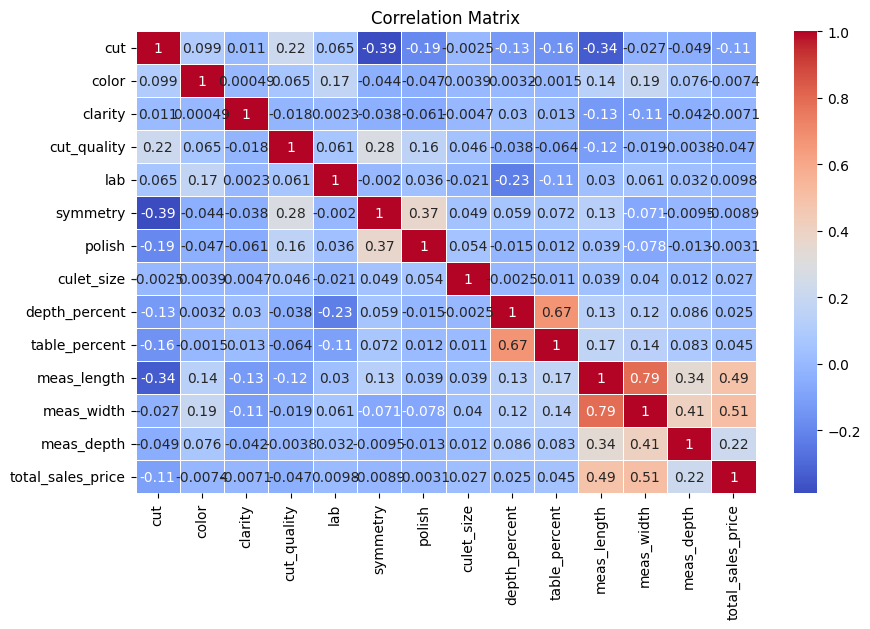

In [149]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(a, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [150]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,5])], remainder='passthrough')
X1 = np.array(ct.fit_transform(X))

In [151]:
X1

array([[0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 2.870000e+00,
        1.790000e+00, 2.000000e+02],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 2.890000e+00,
        1.780000e+00, 2.000000e+02],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 2.900000e+00,
        1.770000e+00, 2.000000e+02],
       ...,
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 1.710000e+01,
        1.020000e+01, 1.315496e+06],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 4.900000e+00,
        3.470000e+00, 1.350000e+06],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 1.109000e+01,
        7.390000e+00, 1.449881e+06]])

#**Multiple linear regression model building**

In [152]:
from sklearn.preprocessing import StandardScaler
object = StandardScaler()
X1= object.fit_transform(X1)

In [153]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X1,Y,test_size=0.2,random_state=0)


In [154]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [155]:
y_pred = regressor.predict(x_test)

#**Model evaluation**

In [156]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
score = r2_score(y_test,y_pred)
mean_error = mae(y_test,y_pred)
mean_error

0.12775759846315718

In [157]:
score

0.855761362726564

In [158]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test, y_pred, squared=False))
print(f"RMSE= {rmse}")
relative_rmse=(rmse/Y.mean())*100
print(f"Relative_RMSE = {relative_rmse}")


RMSE= 0.5686386005344407
Relative_RMSE = 75.29879637583062


In [159]:

X1

array([[-8.82018521e-02, -4.91284790e-02, -1.35898751e-01, ...,
        -1.64829573e+00, -7.27898745e-01, -2.58405553e-01],
       [-8.82018521e-02, -4.91284790e-02, -1.35898751e-01, ...,
        -1.63374526e+00, -7.32765358e-01, -2.58405553e-01],
       [-8.82018521e-02, -4.91284790e-02, -1.35898751e-01, ...,
        -1.62647003e+00, -7.37631972e-01, -2.58405553e-01],
       ...,
       [-8.82018521e-02, -4.91284790e-02, -1.35898751e-01, ...,
         8.70436223e+00,  3.36492296e+00,  5.04089526e+01],
       [-8.82018521e-02, -4.91284790e-02, -1.35898751e-01, ...,
        -1.71423233e-01,  8.96922730e-02,  5.17381032e+01],
       [-8.82018521e-02, -4.91284790e-02, -1.35898751e-01, ...,
         4.33194661e+00,  1.99740465e+00,  5.55856831e+01]])

#**Hyperparameter tuning using grid searchCV**

In [160]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
r = Ridge()
parameter = {'alpha':[1e-40,1e-30,1e-15,1e-10,1e-8,1e-5,1e-3]}
ridge = GridSearchCV(r,parameter,scoring='neg_mean_squared_error',cv =5)
ridge.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.69007e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-40, 1e-30, 1e-15, 1e-10, 1e-08, 1e-05,
                                   0.001]},
             scoring='neg_mean_squared_error')

#**After hyper parameter tunning results on the regression models**

In [161]:
y_ridge_test = ridge.predict(x_test)
score = r2_score(y_test,y_ridge_test)
score

0.8557663527256065

In [162]:
rmse=np.sqrt(mean_squared_error(y_test, y_ridge_test, squared=False))
print(f"RMSE= {rmse}")
relative_rmse=(rmse/Y.mean())*100
print(f"Relative_RMSE = {relative_rmse}")
mean_error = mae(y_test,y_ridge_test)
mean_error

RMSE= 0.568633682395067
Relative_RMSE = 75.29814511864389


0.1278270851573458

Using hyper parameter value  we observed that their is small increase in the r2 square value and also changes the RMSE and MAE value

#**The best hyperparameter values**

In [163]:
ridge.best_params_

{'alpha': 0.001}